<a href="https://colab.research.google.com/github/Purnachandarvallala/Retail-Sales-Rule-Based-Expert-System/blob/main/Copy_of_Used_cars_Dss_ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.listdir()

['.config', 'used_cars.csv', 'sample_data']

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/used_cars.csv")
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB
None


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64


In [ ]:
# Fill numeric nulls with median
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    df[col].fillna(df[col].median(), inplace=True)

    # Fill categorical nulls with mode
    for col in df.select_dtypes(include=["object"]).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-2068887934.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2068887934.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
print("\nPrice Summary:")
print(df["price"].describe())


Price Summary:
count        4009
unique       1569
top       $15,000
freq           39
Name: price, dtype: object


In [ ]:
df['price'] = df['price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
df['milage'] = df['milage'].replace({r' mi\.': '', r',': ''}, regex=True).astype(float)
X = df.drop("price", axis=1)
y = df["price"]

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42
      )

In [ ]:
models = {
      "Linear Regression": LinearRegression(),
          "Ridge Regression": Ridge(),
              "Lasso Regression": Lasso(),
                  "Decision Tree": DecisionTreeRegressor(random_state=42),
                      "Random Forest": RandomForestRegressor(random_state=42)
                      }


In [ ]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": model_name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

In [ ]:
results_df = pd.DataFrame(results)

print("\nModel Performance Comparison:")
print(results_df.sort_values(by="R2 Score", ascending=False))


Model Performance Comparison:
               Model           MAE           RMSE  R2 Score
4      Random Forest  19242.551858  134928.115314  0.109297
1   Ridge Regression  19020.754422  136743.699294  0.085165
3      Decision Tree  22212.405237  137253.762389  0.078327
0  Linear Regression  19781.166761  138205.557115  0.065500
2   Lasso Regression  18348.960387  138446.089365  0.062245


In [ ]:
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

best_model

RandomForestRegressor(random_state=42)

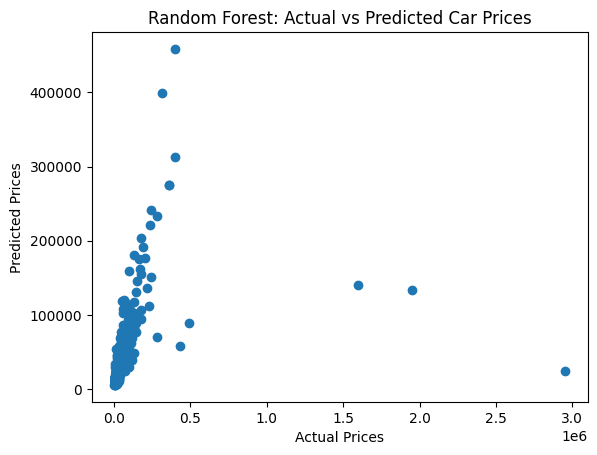

In [ ]:
y_test_pred = best_model.predict(X_test)

plt.figure()
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted Car Prices")
plt.show()

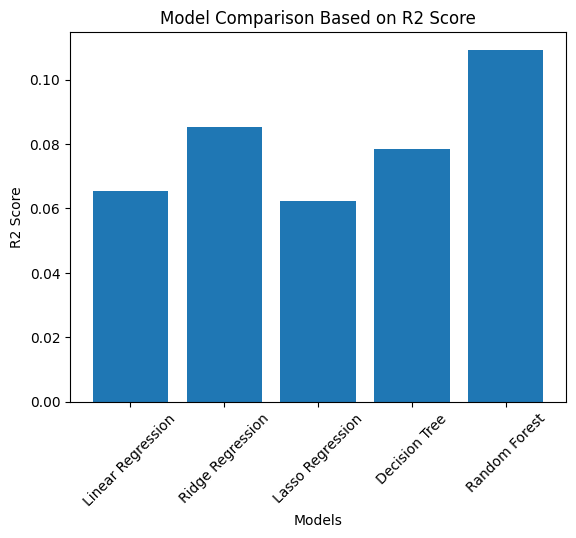

In [ ]:
r2_scores = dict(zip(results_df["Model"], results_df["R2 Score"]))

plt.figure()
plt.bar(r2_scores.keys(), r2_scores.values())
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.title("Model Comparison Based on R2 Score")
plt.xticks(rotation=45)
plt.show()

Conclusion:
This project applied machine learning techniques to predict used car prices using relevant vehicle features. Several regression models were trained and evaluated, and the Random Forest model showed the best performance. The study demonstrates a systematic machine learning approach, including data preprocessing, model training, and performance evaluation.